## Kobe Bryant Tribute Word Cloud

@Author: Deep Contractor

In [3]:
import pandas as pd 
import numpy as np
from os import path, getcwd
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image

In [2]:
from twitterscraper import query_tweets 
import datetime as dt

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; x64; fr; rv:1.9.2.13) Gecko/20101203 Firebird/3.6.13'}


In [4]:
begin_date = dt.date(2020,1,26)
end_date = dt.date(2020,1,27)
lang = 'english'
limit = 10000

In [5]:
tweets = query_tweets("#Kobe", begindate = begin_date, enddate=end_date, limit=limit, lang=lang)

INFO: queries: ['#Kobe since:2020-01-26 until:2020-01-27']
INFO: Got 10009 tweets (10009 new).


In [11]:
df = pd.DataFrame(i.__dict__ for i in tweets)

In [13]:
df.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,imrealmitesh,Mitesh 💛,1209876362158206976,1221583595933880320,/imrealmitesh/status/1221583595933880320,2020-01-26 23:59:59,1580083199,RIP kobe bryant #RIPKobeBryant #Kobe #RIPMamba...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,[https://pbs.twimg.com/media/EPPvzEyUwAAdUC9.jpg],,1,0,0,False,False,,[]
1,muhammetkasal7,Muhammet Kasal,775079982267789312,1221583592700203010,/muhammetkasal7/status/1221583592700203010,2020-01-26 23:59:59,1580083199,"#Kobe ""En önemli şey, çabalamak ve insanlara m...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,[https://pbs.twimg.com/media/EPPvypYXUAYnZmv.jpg],,1,0,0,False,False,,[]
2,warriors_mom,TheCyberChick,75184478,1221583581606305799,/warriors_mom/status/1221583581606305799,2020-01-26 23:59:56,1580083196,More on the #Kobe #KobeBryant Accident Sikorsk...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://aviation-safety.net/wikibase/232468],...,False,[],,1,0,0,False,False,,[]
3,EmirHanolu4,Emir Hanoğlu,1166088996302327808,1221583581308432386,/EmirHanolu4/status/1221583581308432386,2020-01-26 23:59:56,1580083196,#Kobe #KobeBryantpic.twitter.com/jUyzYaNG7Q,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,[https://pbs.twimg.com/media/EPPvyemX4AA-Cqu.jpg],,0,0,0,False,False,,[]
4,nobiibaby,nobiyonce 🌻,101674219,1221583579135778819,/nobiibaby/status/1221583579135778819,2020-01-26 23:59:55,1580083195,"I can't imagine why, how, whaaat.. 5 lives are...","<p class=""TweetTextSize js-tweet-text tweet-te...",[https://www.instagram.com/p/B7zVjkVlOrs293vkH...,...,False,[],,0,0,0,False,False,,[]


In [54]:
df.shape

(10009, 21)

In [55]:
df.to_csv('tweets.csv')

In [4]:
user_tweets = pd.read_csv('tweets.csv')

In [5]:
user_tweets.shape

(10009, 22)

In [6]:
tweet_words = " ".join(user_tweets.text.drop_duplicates())

In [7]:
#removing punchuation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(tweet_words)

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
words_1 = ' '.join(words)

In [10]:
#removing stop words
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = set(stopwords.words('english'))
text = word_tokenize(words_1)

In [11]:
text=[x.lower() for x in text]

In [12]:
unwanted = ['kobe','bryant','kobebryant','https','helicopter', 'crash','today','rip','accident','daughter','death','black','pic','com']

In [13]:
text = " ".join([w for w in text if w not in unwanted])

In [14]:
no_digits=[]
for i in text:
    if not i.isdigit():
        no_digits.append(i)
result = ''.join(no_digits)

In [15]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
sent = result
final =" ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\deepc\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:
final

'twitter en twitter more on the s b aviation safety net twitter i can t imagine why how are lost and many hearts our broken legend our are with all of you p state farm arena p the mystic of life and make us always ponder about its meaning in the utmost meaningful way possible may family find peace despite his the other as well our mamba from se y you should be ashamed for posting that tweet silence twitter twitter the basketball will never be the same again rest in peace twitter twitter respect thank you and thank you forever twitter status i think this thing is so inconceivable because of the person that he was this dude was incapable of submission coming back from a torn the mamba mentality it s just this guy passing away because of how strong he was i m at a loss for a great player and a great father and all who lost god bless you both for the twitter i look at the absolute bottom line a wife lost her husband and her three have lost their dad and their sister and the on the twitter 

In [52]:
import os
p = os.getcwd()
mask_logo = np.array(Image.open(path.join(p,'kobe.png')))

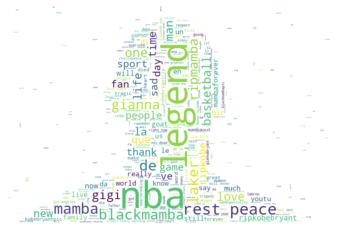

<Figure size 432x288 with 0 Axes>

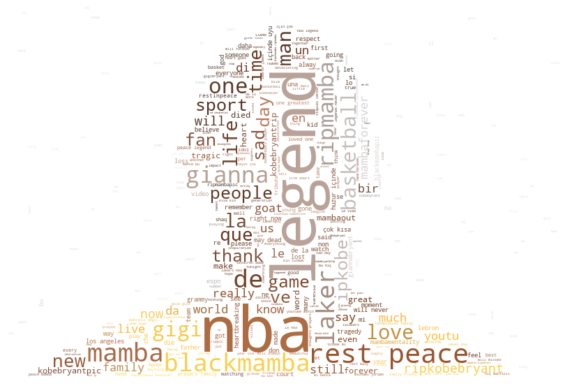

In [53]:
stopwords = set(STOPWORDS)
stopwords.add('www')
stopwords.add('instagram')
stopwords.add('twitter')
stopwords.add('igshid')
stopwords.add('status')
wc = WordCloud(background_color="white", max_words=2000, mask=mask_logo,stopwords=stopwords)
# generate word cloud
wc.generate(text)
# store to file
# wc.to_file(path.join(p, "kobe.png"))
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
image_colors = ImageColorGenerator(mask_logo)
wc.recolor(color_func=image_colors).to_file('kobe.png')
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()